In [20]:
%pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
# @title Import dependancies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimension of x: (100, 2)
dimension of y: (100, 1)


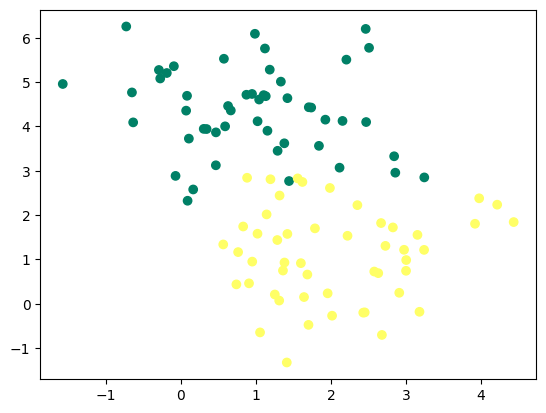

In [22]:
# @title Create dataset with 100 datas and 2 variable
x,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

# displays x and y dimensions
print("dimension of x:", x.shape)
print("dimension of y:", y.shape)

plt.scatter(x[:,0], x[:,1], c=y, cmap="summer")

In [23]:
# @title createt initialization function

def initialization(X):
  """
  ceci nous donnera un vecteur W (2,1 ) car l'idée c'est d'avoir un vecteur
  w qui contient autant de parametre qu'il y'a de variable
  """
  W = np.random.randn(X.shape[1], 1)

  """ pour le parametre b(biais) nous lui passons un nombre réel
  car la fonction d'initialisation est z = w1x1 + w2x2 + b
  """
  b = np.random.randn(1)

  return (W, b)

# test
W, b = initialization(x)
print(W.shape)
print(b.shape)

(2, 1)
(1,)


In [24]:
# @title implement our model function
def model(X, W, b):
  """
    the first things we are doing is build Z function (Z= XW + b)
    then we are compute activation function A = 1 / 1 + e(-Z)
  """
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))

  return A

A = model(x, W, b)
A.shape

(100, 1)

In [25]:
# @title implement the Log Loss function(fonction coût)

def log_loss(A, y):
  """
    in theorie L = -1/m sum(log(ai)*yi + (1-yi)*log(1-ai))
    m = number of data in our dataset then m = len(y)
  """
  return  1 / len(y) * np.sum(-y * np.log(A) - (1 - y)*np.log(1 - A))

  # this function return a real number which measure of error our model
# test
log_loss(A, y)

0.9726982324209802

In [26]:
# @title Create Gradient function

def gradients(A, x, y):
  """
    we have two gradients the jacobien that we note dW and db( derivative of
    log_loss function with respect to b)
    dW = 1/m * trans(X).(A-Y)
    db = 1 /m * sum(A-Y)
  """
  dW = 1 / len(y) * np.dot(x.T, A-y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)
# test
dw,db= gradients(A, x, y)
print(dw.shape)
db

(2, 1)


-0.3187154768094614

In [27]:
# @title build the update function

"""
this function take as input the gradients, W, b and learning rate
"""
def update(dW, db, W, b, learning_rate):
  # nous allons implementer l'agorithme de la descencte de gradient
  """
  wi = wi - a(dl/dwi)  a= learning rate and (dl/dwi) = dW
  bi = bi - a(dl/dbi)  (dl/dbi) = db
  """
  W = W - learning_rate * dW
  b = b - learning_rate * db

  return (W, b)

# test
W, b = update(dw, db, W, b, 2)
W

array([[ 2.33344499],
       [-1.43419031]])

In [28]:
# @title create a prediction function

def predict(X, W, b):
  # computer the output of the model (activation)
  A = model(X, W, b)
  print(A)
  return A >= 0.5

In [29]:
from sklearn.metrics import accuracy_score

In [35]:
# @title build our Artificial neural

"""
  cette fonction va prendre en entré nos données x et y , un pas d'apprentissage
  pour notre fonction de mise a jour et nombre d'iteration pour notre algo
  d'apprentissage
"""
def artificial_neuron(X, y, learning_rate=0.5, n_iter=100):
  # initialization of parameter w and b
  W,b = initialization(X)

  Loss = []
  # create learning loop
  for i in range(n_iter):
    # launch result of our model
    A = model(X, W, b)

    # capture error of our model
    Loss.append(log_loss(A, y))

    #create dW, db gradient
    dW,db = gradients(A, X, y)

    # update W and b parameters
    W, b = update(dW,db, W, b, learning_rate)

  # compute the preddiction of all data x in dataset
  # en d'autre terme on calcul ce que la machine predit pour ces san valeurs
  y_pred = predict(X,W, b)

  # display the performance of our model in computing the accuracy metrics
  print(accuracy_score(y, y_pred))

  plt.plot(Loss, c='r')
  plt.show()

  # then return W and b parameter which model learned
  return (W, b)

[[9.82777536e-01]
 [9.03500342e-01]
 [1.50270965e-03]
 [1.47582764e-01]
 [9.86299627e-01]
 [3.58330595e-01]
 [3.78922629e-02]
 [9.70493483e-01]
 [2.53114290e-02]
 [9.56717575e-01]
 [1.33514039e-02]
 [9.52491421e-01]
 [8.14060885e-03]
 [7.32731647e-03]
 [8.22516638e-01]
 [9.92959167e-01]
 [9.98242580e-01]
 [1.88243658e-02]
 [8.85179872e-01]
 [7.77398570e-01]
 [1.88027796e-02]
 [1.63238150e-02]
 [4.37183004e-01]
 [1.40171734e-03]
 [9.83969603e-01]
 [1.26350275e-02]
 [9.67290456e-01]
 [1.79812778e-03]
 [2.95902688e-02]
 [8.18072715e-01]
 [9.95244879e-01]
 [1.87157425e-02]
 [8.23714113e-01]
 [9.95325052e-01]
 [4.23933095e-01]
 [1.55451235e-01]
 [8.96831084e-01]
 [6.00002157e-01]
 [4.69295522e-01]
 [6.02400104e-01]
 [5.53526635e-02]
 [2.30797479e-02]
 [1.32838152e-04]
 [1.21344775e-01]
 [1.87943311e-01]
 [9.15829559e-01]
 [9.92457678e-01]
 [9.91562678e-01]
 [1.45401259e-03]
 [2.42583326e-03]
 [9.82397464e-01]
 [7.21650174e-01]
 [1.13973883e-02]
 [1.50073518e-02]
 [8.53749937e-01]
 [1.746620

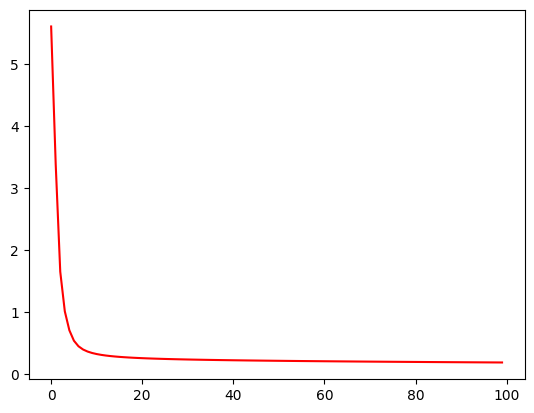

In [36]:
W, b = artificial_neuron(x, y)

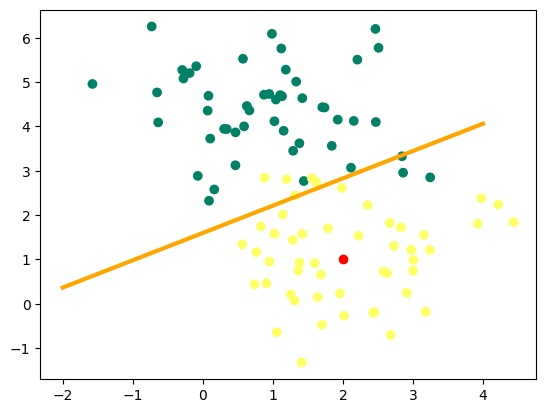

[0.96167248]


"\non constate que grace a cette frontière de décision\nla machine a predit que une perfomance du modèle sur les 100 données\nce qui veut dire que si la performance est 92% alors 8 données ne s'aurait\nêtre du bon côté de la frontière de décision\n"

In [32]:
# @title Predict the class of the new_data not in our dataset
new_data = np.array([2, 1])

#  dessinons la frontiere de décision
"""
on sait A = 50% signifie qu'il existe un couple (x1, x2) pour lesquels z = 0
z(x1,x2) = 0
w1x1 + w2x2 + b = 0
pour construire cette droite on a:
X1  | X2
-2|
 08 |
pour trouver les valeurs de x2 on se sert de l'équation précedente
x2 = (-w1x1 - b) / w2
"""
x0 = np.linspace(-2, 4, 100)

x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(x[:,0], x[:,1], c=y, cmap="summer")
plt.scatter(new_data[0], new_data[1], c="r")
plt.plot(x0, x1, c="orange", lw=3)
plt.show()

predict(new_data, W, b)
"""
on constate que grace a cette frontière de décision
la machine a predit que une perfomance du modèle sur les 100 données
ce qui veut dire que si la performance est 92% alors 8 données ne s'aurait
être du bon côté de la frontière de décision
"""